<a href="https://colab.research.google.com/github/gtoubian/cce/blob/main/4_3_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression

In today's lecture, we will be looking more indepth into Regression Models to see how we can extrapolate or interpolate data.

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

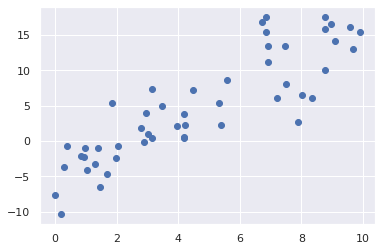

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + (4 * rng.randn(50))
plt.scatter(x, y)

We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

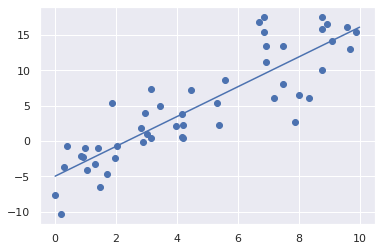

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are ``coef_`` and ``intercept_``:

In [ ]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.1088352414427822
Model intercept: -4.994308342212824


We see that the results are very close to the inputs, as we might hope.

# The Math of Regression

Linear regression is the line where the square of the distance to points in the dataset is the minimum.

So if we take the distance between our line and data points, the square of these should be the minimum possible:

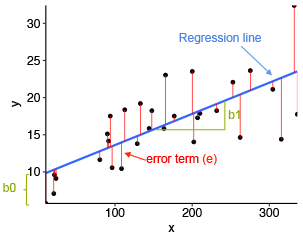

There are many algorithms to fit a linear regression, and we'll see them in later lectures.

# Outliers

Because linear regression is based on the square of the distance, it's subject to being pushed around by outlier values (observations on the far right or left of the distribution)

Model slope:     3.0561458648971715
Model intercept: -7.726365207615311


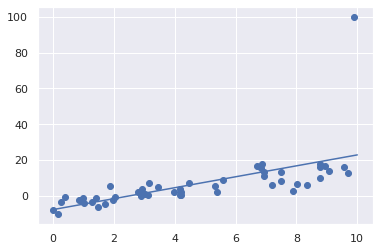

In [ ]:
# Create an outlier at the end
y[np.argmax(x)] = 100.

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

plt.scatter(x, y)
plt.plot(xfit, yfit)

We can see the slope increases by 1.5x and the intercept reduces by a similar amount.

We could minimize the raw distance or some other metric (these are called **loss functions**) but squared distance have [nice statistical properties](https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem) that make it desireable.

Moreover, we can alway use strategies to deal with outlier problems. Rescaling the y axis to achieve the same effect as using the direct loss norm while still keeping the squared loss norm will dampen outliers:

Model slope:     0.5134359352380273
Model intercept: -0.405310756747681


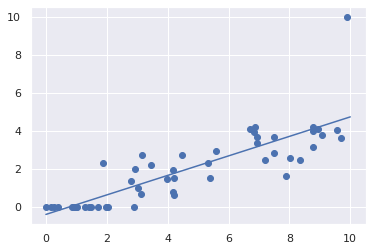

In [ ]:
# Square root y with negative values
y = np.sqrt(np.abs(y)) * (y >= 0)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

plt.scatter(x, y)
plt.plot(xfit, yfit)

#Multiple Regression

This is called **simple regression** (regression on one variable).

Generally we want to do **multiple** or Multidimensional regression, to take into account many features.

In [ ]:
import statsmodels.api as sm
sns.set()

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + (4 * rng.randn(50))

est = sm.OLS(y, x).fit()
est.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.737
Model:                            OLS   Adj. R-squared (uncentered):              0.731
Method:                 Least Squares   F-statistic:                              137.1
Date:                Thu, 18 Mar 2021   Prob (F-statistic):                    8.29e-16
Time:                        08:43:07   Log-Likelihood:                         -146.53
No. Observations:                  50   AIC:                                      295.1
Df Residuals:                      49   BIC:                                      297.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.3596      0.116     11.709      0.000       1.126       1.593
==============================================================================
Omnibus:                        1.356   Durbin-Watson:                   1.553
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                1.362
Skew:                           0.326   Prob(JB):                        0.506
Kurtosis:                       2.521   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

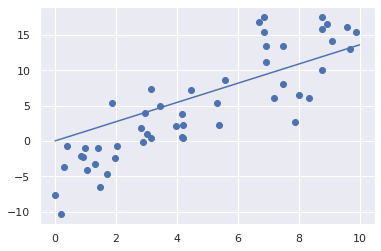

In [ ]:
#See how the model fits
xfit = np.linspace(0, 10, 1000)
yfit = est.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

# Constant term

Note that the intercept is $0$ in our model! This is because statsmodels works on matrices and all inputs, including the intercept, have to be specified.

Matrix regression can be seen as finding $\beta$ such that

$$(\beta \cdot X - y)^2$$

is minimized.

In the case of simple regression without an intercept, $\beta$ is the slope. In simple regression **with an intercept**, $\beta = [intercept, slope]$.

Since this means $\beta$ is $2 \times 1$ then we need the matrix to be $n \times 2$ and the first column to be a constant scale of $\beta[0]$. 

The way we do this is with a column vector of ones. `sm.add_constant` makes this easy.

In [ ]:
x = sm.add_constant(x)
x

In [ ]:
est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     151.9
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           1.75e-16
Time:                        08:54:25   Log-Likelihood:                -135.25
No. Observations:                  50   AIC:                             274.5
Df Residuals:                      48   BIC:                             278.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.9943      0.954     -5.232      0.000      -6.913      -3.075
x1             2.1088      0.171     12.326      0.000       1.765       2.453
==============================================================================
Omnibus:                        0.058   Durbin-Watson:                   1.590
Prob(Omnibus):                  0.971   Jarque-Bera (JB):                0.057
Skew:                           0.048   Prob(JB):                        0.972
Kurtosis:                       2.865   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

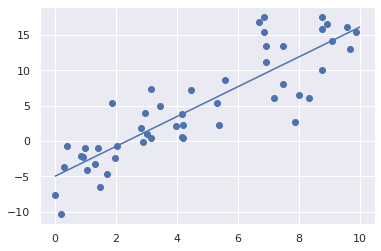

In [ ]:
xfit = np.linspace(0, 10, 1000)
yfit = est.predict(sm.add_constant(xfit))

plt.scatter(x[:, 1], y)
plt.plot(xfit, yfit)

# Matrix form regression

We can solve for the procedure for finding $\beta$. You don't need to understand everything here, but we'll quickly run through the procedure. Set up the minimum problem to find $\beta$ that minimizes:

$$ min_\beta (\beta \cdot X - y)^2$$

The first derivative is set to zero to find the minimum point in the equation:

$$ X^T(\beta \cdot X - y) = 0$$

Which gives

$$ X^TX\beta = X^Ty$$

Solving for $\beta$:

$$\beta = (X^TX)^{-1}X^Ty$$

**NOTE:** Ordinary least squares is the only problem where we have a closed solution for $\beta$. We call it the "normal equation" because of it. 

In [ ]:
# Returns array with [intercept, slope]
X = x.copy()

beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
beta

array([-4.99430834,  2.10883524])

## Basis Function Regression

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.

The idea is to take our linear model:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

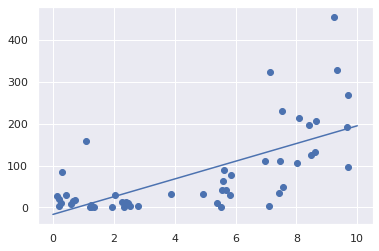

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     39.29
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           9.74e-08
Time:                        08:56:00   Log-Likelihood:                -287.37
No. Observations:                  50   AIC:                             578.7
Df Residuals:                      48   BIC:                             582.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.5728     19.056     -0.870      0.389     -54.887      21.741
x1            21.1411      3.373      6.268      0.000      14.360      27.922
==============================================================================
Omnibus:                       19.862   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.426
Skew:                           1.335   Prob(JB):                     6.72e-07
Kurtosis:                       5.552   Cond. No.                         10.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x = 10 * rng.rand(50)
y = np.square(2 * x - 5 + (4 * rng.randn(50)))

x = sm.add_constant(x)

est = sm.OLS(y, x).fit()

xfit = sm.add_constant(np.linspace(0, 10, 1000))
yfit = est.predict(xfit[:, np.newaxis])

fig, ax = plt.subplots()
ax.scatter(x[:,1], y)
ax.plot(xfit[:,1], yfit)
plt.show()

est.summary()

### With Squared Feature

We can add a third term to the matrix

In [ ]:
x = sm.add_constant(x)
x = np.concatenate([x, np.square(x[:,1])[:, np.newaxis]], axis=1)
x

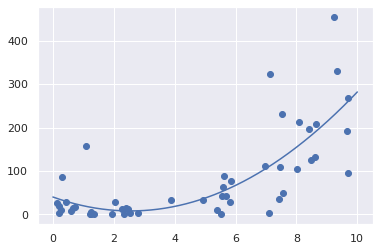

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     32.52
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           1.36e-09
Time:                        08:56:57   Log-Likelihood:                -280.60
No. Observations:                  50   AIC:                             567.2
Df Residuals:                      47   BIC:                             572.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0816     22.420      1.788      0.080      -5.021      85.184
x1           -25.1428     12.470     -2.016      0.050     -50.230      -0.055
x2             4.9311      1.290      3.822      0.000       2.336       7.527
==============================================================================
Omnibus:                       21.411   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.295
Skew:                           1.257   Prob(JB):                     2.93e-09
Kurtosis:                       6.542   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
est = sm.OLS(y, x).fit()

xfit = sm.add_constant(np.linspace(0, 10, 1000))
xfit = np.concatenate([xfit, np.square(xfit[:,1])[:, np.newaxis]], axis=1)
yfit = est.predict(xfit[:, np.newaxis])

fig, ax = plt.subplots()
ax.scatter(x[:,1], y)
ax.plot(xfit[:,1], yfit)
plt.show()

est.summary()

If we add $x$ and $x^2$ to the model, we fit the **best parabola** instead of the **best line** to the data

In [ ]:
x = np.concatenate([x, (x[:,1] ** 3)[:, np.newaxis]], axis=1)
x

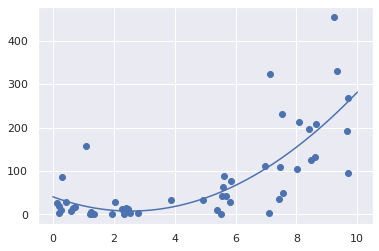

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     21.22
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           8.93e-09
Time:                        08:57:48   Log-Likelihood:                -280.60
No. Observations:                  50   AIC:                             569.2
Df Residuals:                      46   BIC:                             576.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.5041     29.482      1.374      0.176     -18.840      99.848
x1           -25.7808     31.147     -0.828      0.412     -88.476      36.914
x2             5.0964      7.492      0.680      0.500      -9.984      20.177
x3            -0.0111      0.498     -0.022      0.982      -1.013       0.990
==============================================================================
Omnibus:                       21.398   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.210
Skew:                           1.257   Prob(JB):                     3.06e-09
Kurtosis:                       6.536   Cond. No.                     1.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
est = sm.OLS(y, x).fit()

xfit = sm.add_constant(np.linspace(0, 10, 1000))
xfit = np.concatenate([
    xfit, 
    np.square(xfit[:,1])[:, np.newaxis],
    (xfit[:,1] ** 3)[:, np.newaxis]
    ], axis=1
)
yfit = est.predict(xfit[:, np.newaxis])

fig, ax = plt.subplots()
ax.scatter(x[:,1], y)
ax.plot(xfit[:,1], yfit)
plt.show()

est.summary()

# Reading P-Values in a regression table

Adding a cube feature doesn't seem to do anything (see the coefficient value is very close to 0). The adjusted $R^2$ (which indicates how well the model fits to data) even went down.

The $P > |t|$ column is a **t-test** result for the null hypothesis on this coefficient. We see in the squared regression, most coefficients pass the t-test, but now they all seem to fail it (so all the coefficients are not significantly differeent than 0 anymore)

All of this indicates the previous model was better

# It's all about squares

One key diagnostic variable in a regression is the $R^2$ or [R Squared](https://en.wikipedia.org/wiki/Coefficient_of_determination). The formula for it is:

$$R^2 = 1 - \dfrac{SS_{res}}{SS_{tot}}$$

Where $SS_{tot}$ is the total sum of squared difference from the mean, which is the variance:

$$SS_{tot} = var(y) = \sum (y_i - \bar{y})^2$$

And $SS_{res}$ is the sum of prediction errors or *residuals*

$$SS_{res} = \sum (y_i - \hat{y})^2 = \sum e_i^2$$

**R squared is a measure of predicted variation**

This means that a model with $R^2 = 0$ has no more predictive value than just predicting the average on every point.

# Adjusted R^2

The [Adjusted Rsqr](https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2) penalizes the $R^2$ for each coefficient you add to the model.

The formula penalizes for lost [degrees of freedom](https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics)) and is:

$$\bar{R^2} = 1 - (1 - R^2)\dfrac{n-1}{n-p-1}$$

Where $n$ is the number of observations in the data and $p$ is the number of coefficients that are fitted in the model.

**degrees of freedom**

The [degrees of freedom](https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics)) is the number of values in a statistical calculation that are free to vary. This is effectively the remainder between observation points in your dataset and the number of coefficients being estimated.

Later on, we'll talk about **overfitting** in machine learning, which is a related concept.

See what happens when we put too many polynomials to a regression:

- R2 goes down

- Gap between R2 and R2adj grows large

- Model Fit becomes very data-specific

   - Loses extrapolation (not predictive out of sample)

   - Fit has large nonsense variations compared to real world data interpretation

#Feature Selection Based On P Value

Coefficients are the "slope" on each of the regression coefficients for **the relation between that x and the y**.

Let's use the Boston House Price dataset:



In [ ]:
from sklearn.datasets import load_boston
import pandas as pd

boston = pd.DataFrame(load_boston().data,columns = load_boston().feature_names )
y = load_boston().target

X = sm.add_constant(boston)
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 18 Mar 2021   Prob (F-statistic):          6.72e-135
Time:                        09:03:17   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Right away, we look at **P-Values** to see what we don't care about. AGE and INDUS are good candidates to throw out.

In [ ]:
X = X.drop(columns=['INDUS', 'AGE'])
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Thu, 18 Mar 2021   Prob (F-statistic):          5.54e-137
Time:                        09:06:54   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""